# OpenCV day3

## 컬러 스페이스

### RGB, BGR, RGBA

In [1]:
import cv2
import numpy as np

img = cv2.imread('./img/opencv_logo.png')    # 기본값 옵션
bgr = cv2.imread('./img/opencv_logo.png', cv2.IMREAD_COLOR)    # IMREAD_COLOR 옵션
bgra = cv2.imread('./img/opencv_logo.png', cv2.IMREAD_UNCHANGED)    # IMREAD_UNCHANGED 옵션

print('default : ', img.shape, 'color : ', bgr.shape, 'unchanged : ', bgra.shape)

cv2.imshow('bgr', bgr)
cv2.imshow('bgra', bgra)
cv2.imshow('alpha', bgra[:,:,3])    # 알파 채널만 표시
cv2.waitKey(0)
cv2.destroyAllWindows()

default :  (120, 98, 3) color :  (120, 98, 3) unchanged :  (120, 98, 4)


### 컬러 스페이스 변환

컬러 이미지를 그레이스케일로 변환하는 것은 이미지 연산의 양을 줄여 속도를 높일 수 있다.

맨처음부터 그레이 스케일로 이미지를 불러올 수 있지만,
상황에 따라 컬러 스케일로 읽고 필요에 따라 다른 컬러 스페이스로 변환해야 할때도 많다.
다음은 그레이 스케일로 변환하는 방법이다.

In [4]:
import cv2
import numpy as np

img = cv2.imread('./img/girl.jpg')
img2 = img.astype(np.uint16)    # dtype 변경
b,g,r = cv2.split(img2)       # 채널별로 분리
gray1 = ((b+g+r)/3).astype(np.uint8)   # 평균값 연산 후 dtype 변경

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # BGR을 그레이스케일로 변경
cv2.imshow('original', img)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

##### cv2.cvtColor(img, flag)

* img : Numpy 배열, 변환할 이미지
* flag : 변환할 컬러 스페이스, cv2.COLOR_ 로 시작하는 함수(274개)
  * cv2.COLOR_BGR2GRAY : BGR 컬러 이미지를 그레이 스케일로 변환
  * cv2.COLOR_GRAY@BGR : 그레이 스케일 이미지를 BGR 컬러 이미지로 변환
  * cv2.COLOR_BGR2RGB : BGR 컬러 이미지를 RGB 컬러 이미지로 변환
  * cv2.COLOR_BGR2HSV : BGR 컬러 이미지를 HSV 컬러 이미지로 변환
  * cv2.COLOR_HSV2BGR : HSV 컬러 이미지를 BGR 컬러 이미지로 변환
  * cv2.COLOR_BGR2YUV : BGR 컬러 이미지를 YUV 컬러 이미지로 변환
  * cv2.COLOR_YUV2BGR : YUV 컬러 이미지를 BGR 컬러 이미지로 변환
  * [i for i in dir(cv2) if i startswith('COLOR_') 로 함수 종류 확인
 
* out : 변환한 결과 이미지 (numpy 배열)

### HSV, HSI, HSL

RGV 와 마찬가지로 3개 채널로 컬러 이미지를 표시.
H(Hue, 색조), S(Saturation, 채도), V(Value, 명도)
I(Intensity, 밀도)
L(Lughtness, 명도)

#### H
* 빨강 : 165~180, 0~15
* 초록 : 45~75
* 파랑 : 90~120

#### S
* 0~255 로 표현하며 255일수록 순수한색이다

#### V
* 0~255 로 표현하며 255일수록 밝아진다.

In [5]:
import cv2
import numpy as np

# BGR 컬러스페이스로 원색 픽셀 생성
red_bgr = np.array([[[0,0,255]]], dtype=np.uint8)   # 빨강 값만 갖는 픽셀
green_bgr = np.array([[[0,255,0]]], dtype=np.uint8)  # 초록 값만 갖는 픽셀
blue_bgr = np.array([[[255,0,0]]], dtype=np.uint8)   # 파랑 값만 갖는 픽셀
yellow_bgr = np.array([[[0,255,255]]], dtype=np.uint8)   # 노랑 값만 갖는 픽셀

# BGR 컬러 스페이스를 HSV 컬러 스페이스로 변환
red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV);
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV);
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV);
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV);


# HSV 로 변환한 픽셀 출력
print('red:', red_hsv)
print('green:', green_hsv)
print('blue:', blue_hsv)
print('yellow:', yellow_hsv)

red: [[[  0 255 255]]]
green: [[[ 60 255 255]]]
blue: [[[120 255 255]]]
yellow: [[[ 30 255 255]]]


### YUV, YCbCR

YUV 포맷은 사람이 색상을 인식할 때 밝기에 더 민감하고 색상은 상대적으로 둔감한 점을 고려해서 만든 컬러스페이스이다.
Y(Luma, 밝기), U(Chroma Blue, Cb, 밝기와 파란색과의 색상 차), V(Chroma Red, Cr, 밝기와 빨간색과의 색상차)

In [6]:
import cv2
import numpy as np

# BGR 컬러 스페이스로 세 가지 밝기의 픽셀 생성
dark = np.array([[[0,0,0]]], dtype=np.uint8)   # 3채널 모두 0인 가장 어두운 픽셀
middle = np.array([[[127,127,127]]], dtype=np.uint8)   # 3채널 모두 127인 중간 밝기 픽셀
bright = np.array([[[255,255,255]]], dtype=np.uint8)   # 3채널 모두 255인 가장 밝은 픽셀

# BGR 컬러 스페이스를 YUV 컬러 스페이스로 변환
dark_yuv = cv2.cvtColor(dark, cv2.COLOR_BGR2YUV)
middle_yuv = cv2.cvtColor(middle, cv2.COLOR_BGR2YUV)
bright_yuv = cv2.cvtColor(bright, cv2.COLOR_BGR2YUV)

# YUV로 변환한 픽셀 출력
print('dark:', dark_yuv)
print('middle:', middle_yuv)
print('bright:', bright_yuv)

dark: [[[  0 128 128]]]
middle: [[[127 128 128]]]
bright: [[[255 128 128]]]


## 스레시 홀딩

이미지를 검은색과 흰색만으로 표현한 것을 binary 이미지라고 한다.
thresholding 이란 여러 값을 경계점을 기준으로 두 부류로 나누는 것으로 바이너리 이미지를 만드는 대표적인 방법이다.

### 전역 스레시 홀딩

바이너리 이미지를 만들기 위해서는 컬러 이미지를 그레이 스케일로 바꿔야 한다.
Numpy 연산 뿐만아니라 OpenCV 함수로 바이너리 이미지를 만들 수 있다.

##### ret, out = cv2.threshold(img, threshold, value, type_flag)
* img : Numpy 배열, 변환할 이미지
* threshold : 경계값
* value : 경계값 기준에 만족하는 픽셀에 적용할 값
* type_flag : 스레시홀드 적용방법 지정
  * cv2.THRESH_BINARY : px > threshold ? value : 0 , 픽셀값이 경계값을 넘으면 value를 지정하고, 넘지 못하면 0을 지정
  * cv2.THRESH_BINARY_INV : px > threshold ? 0 : value, cv2.THRESH_BINARY의 반대
  * cv2.THRESH_TRUNC : px > threshold ? value : px , 픽셀값이 경계값을 넘으면 value를 지정하고, 넘지 못하면 그대로
  * cv2.THRESH_TOZERO : px > threshold ? px : 0, 픽셀값이 경계값을 넘으면 그대로, 넘지 못하면 0을 지정
  * cv2.THRESH_TOZERO_INV : px > threshold ? 0 : px , cv2.THRESH_TOZERO의 반대
* ret : 스레시홀딩에 사용한 경계 값
* out : 결과 바이너리 이미지

127.0


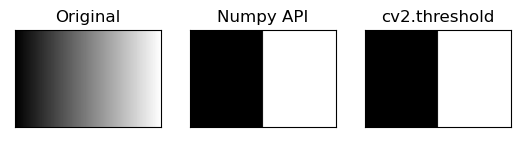

In [18]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지를 그레이스케일로 읽기
img = cv2.imread('./img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE)

thresh_np = np.zeros_like(img)   # 원본과 동일한 크기로 0으로 채워진 이미지 생성
thresh_np[img > 127]=255   # 127보다 큰 값만 255로 변경

# opencv함수로 바이너리 이미지 만들기
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(ret)   # 바이너리 이미지에 사용된 경계값 반환

# 원본과 결과물 출력
imgs = {'Original':img, 'Numpy API':thresh_np, 'cv2.threshold':thresh_cv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

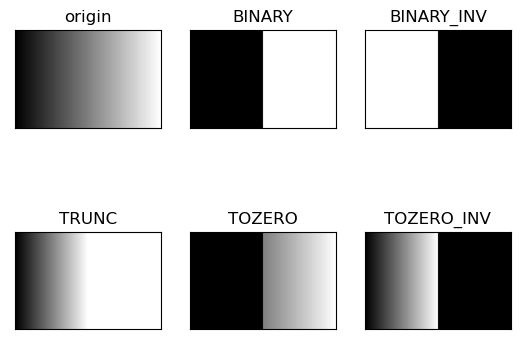

In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE)

ret, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'origin':img, 'BINARY':t_bin, 'BINARY_INV':t_bininv,
       'TRUNC':t_truc, 'TOZERO':t_2zr, 'TOZERO_INV':t_2zrinv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

### 오츠의 알고리즘

한번에 경계값을 찾을수 있는 알고리즘 함수.
모든 경우의 수에 대해 경계값을 조사해야해서 속도가 빠르지 못하다.

otsu threshold: 131.0


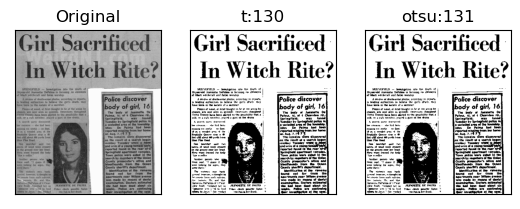

In [7]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./img/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE)

ret, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)
t, t_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('otsu threshold:', t)

imgs = {'Original': img, 't:130':t_130, 'otsu:%d'%t: t_otsu}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

### 적응형 스레시 홀드

이미지를 여러 영역으로 나눈 다음 그 주변 픽셀 값만 가지고 계산해서 경계값을 구한다.

##### cv2.adaptiveThreshold(img, value, method, type_flag, block_size, C)
* img : 입력 영상
* value : 경계 값을 만족하는 픽셀에 적용할 값
* method : 경계값 결정 방법
  * cv2.ADPTIVE_THRESH_MEAN_C : 이웃 픽셀의 평균으로 결정
  * cv2.ADPTIVE_THRESH_GAUSSIAN_C : 가우시안 분포에 따른 가중치의 합으로 결정

* type_flag : 스레시홀드 적용 방법 지정(cv2.threshold() 함수와 동일)
* block_size : 영역으로 나눌 이웃의 크기(n x n), ghftn(3, 5, 7,...)
* C : 계산된 경계 값 결과에서 가감할 상수(음수 가능)

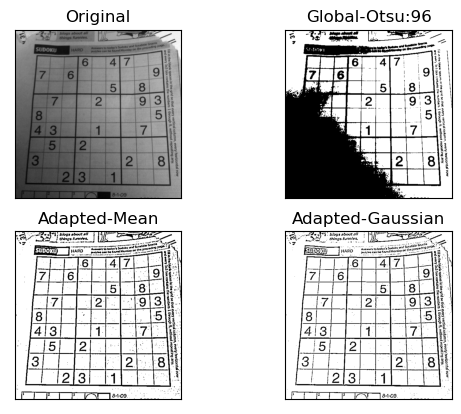

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

blk_size = 9
C = 5
img = cv2.imread('./img/sudoku.png', cv2.IMREAD_GRAYSCALE)

ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blk_size, C)

imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1,
       'Adapted-Mean':th2, 'Adapted-Gaussian':th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## 이미지 연산

### 영상과 영상의 연산

##### dest = cv2.add(src1, src2[ , dest, mask, dtype] ) : src1 과 src2 더하기
* src1 : 입력 영상 1 또는 수
* src2 : 입력 영상 2 또는 수
* dest : 출력 영상
* mask : 0이 아닌 픽셀만 연산
* dtype : 출력 dtype

##### dest = cv2.subtract(src1, src2[ , dest, mask, dtype] ) : src1 과 src2 빼기

##### dest = cv2.multiply(src1, src2[ , dest, mask, dtype] ) : src1 과 src2 곱하기

##### dest = cv2.divide(src1, src2[ , dest, mask, dtype] ) : src1 과 src2 나누기

In [10]:
import cv2
import numpy as np

a = np.uint8([200, 50])
b = np.uint8([100, 100])

# numpy 배열 연산
add1 = a+b
sub1 = a-b
mult1 = a*2
div1 = a/3

# opencv API를 이용한 연산
add2 = cv2.add(a,b)
sub2 = cv2.subtract(a,b)
mult2 = cv2.multiply(a,2)
div2 = cv2.divide(a,3)

# 각 연산결과 출력
print(add1, add2)
print(sub1, sub2)
print(mult1, mult2)
print(div1, div2)

[ 44 150] [[255]
 [150]]
[100 206] [[100]
 [  0]]
[144 100] [[255]
 [100]]
[66.66666667 16.66666667] [[67]
 [17]]


In [12]:
import cv2
import numpy as np

# 연산에 사용할 배열
a = np.array([[1, 2]], dtype=np.uint8)
b = np.array([[10, 20]], dtype=np.uint8)
# 두번째 요소가 0인 마스크 배열 생성
mask = np.array([[1, 0]], dtype=np.uint8)

# 누적 할당과의 비교연산
c1=cv2.add(a,b,None,mask)
print(c1)
c2=cv2.add(a, b, b, mask)
print(c2)
print(b)
print()

# 배열을 그대로 유지하고싶으면

c = np.array([[1, 2]], dtype=np.uint8)
d = np.array([[10, 20]], dtype=np.uint8)

c3 = cv2.add(c,d,d.copy(), mask)
print(c3)
print(d)

[[11  0]]
[[11 20]]
[[11 20]]

[[11 20]]
[[10 20]]


### 알파 블렌딩

아래 예시처럼 더하기 연산으로 원하는 결과를 얻지 못할 수 있다.

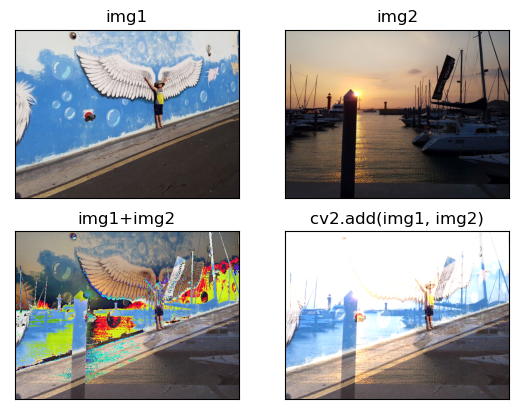

In [13]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# 연산에 사용할 이미지 읽기
img1 = cv2.imread('./img/wing_wall.jpg')
img2 = cv2.imread('./img/yate.jpg')

# 이미지 더하기
img3 = img1 + img2
img4 = cv2.add(img1, img2)

imgs = {'img1':img1, 'img2':img2,
       'img1+img2':img3, 'cv2.add(img1, img2)':img4}

# 이미지 출력
for i, (k,v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.xticks([])
    plt.yticks([])
plt.show()

##### cv2.addWeight(img1, alpha, img2, beta, gamma)

* img1, img2 : 합성할 두 영상
* alpha : img1 에 지정할 가중치(알파 값)
* beta : img2에 지정할 가중치, (1-alpha) 로 적용
* gamma : 연산 결과에 가감할 상수, 보통 0 적용

In [31]:
# 합성에 사용할 알파값
alpha = 0.5

img1 = cv2.imread('./img/wing_wall.jpg')
img2 = cv2.imread('./img/yate.jpg')

# 수식을 직접 연산해서 적용
blended = img1 * alpha + img2 * (1-alpha)
blended = blended.astype(np.uint8)
cv2.imshow('img1 * alpha + img2 * (1-alpha)', blended)

# addWeighted() 함수 적용
dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
cv2.imshow('cv2.addWeighted', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

* 트랙바로 알파 변경할 수 있게 윈도 만들기

In [20]:
import cv2
import numpy as np

win_name = 'Alpha blending'
trackbar_name = 'fade'

def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0)
    cv2.imshow(win_name, dst)
    
img1 = cv2.imread('./img/man_face.jpg')
img2 = cv2.imread('./img/lion_face.jpg')

cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

### 비트와이즈 연산

비트와이즈 연산은 두 영상을 합성할 때 특정 영역만 선택하거나 특정 영역만 제외하는 등의 선별적인 연산에 도움이 된다.
opencv에서 제공하는 비트와이즈 연산 함수는 다음과 같다.

* bitwise_and(img1, img2, mask=None) : 각 픽셀에 대해 비트와이즈 AND 연산
* bitwise_or(img1, img2, mask=None) : 각 픽셀에 대해 비트와이즈 OR 연산
* bitwise_xor(img1, img2, mask=None) : 각 픽셀에 대해 비트와이즈 XOR 연산
* bitwise_not(img1, img2, mask=None) : 각 픽셀에 대해 비트와이즈 NOT 연산
  * img1, img2 : 연산 대상 영상, 동일한 shape
  * mask: 0이 아닌 픽셀만 연산, 바이너리 이미지

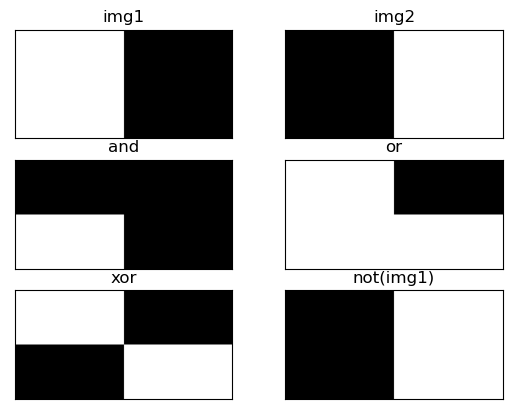

In [24]:
import numpy as np, cv2
import matplotlib.pylab as plt

img1 = np.zeros( (200, 400), dtype=np.uint8)
img2 = np.zeros( (200, 400), dtype=np.uint8)
img1[:, :200]=255
img2[100:200,:] =255

# 비트와이즈 연산
bitAnd = cv2.bitwise_and(img1, img2)
bitOr = cv2.bitwise_or(img1, img2)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot = cv2.bitwise_not(img1, img2)

imgs = {'img1':img1, 'img2':img2, 'and':bitAnd,
       'or':bitOr, 'xor':bitXor, 'not(img1)':bitNot}

# plot 으로 결과 출력
for i, (title, img)in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

In [30]:
import numpy as np, cv2
import matplotlib.pylab as plt

img = cv2.imread('./img/girl.jpg')

# mask 만들기
mask = np.zeros_like(img)
# cv2.circle(대상 이미지, (원점x, 원점y), 반지름, (색상), 채우기)
cv2.circle(mask, (150, 140), 100, (255,255,255), -1)

# 마스킹
masked = cv2.bitwise_and(img,mask)

# 결과 출력
cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked', masked)
cv2.waitKey()
cv2.destroyAllWindows()